In [1]:
import numpy as np
from librosa.core import cqt
import matplotlib.pyplot as plt
import time
import torch
import torch.nn as nn
from librosa.core import note_to_hz
import pandas as pd

import sys
sys.path.insert(0,'../')

import Spectrogram

import os
os.environ['CUDA_VISIBLE_DEVICES']='3'

if torch.cuda.is_available():
    device = "cuda:0"
    torch.set_default_tensor_type('torch.cuda.FloatTensor')

In [2]:
n_bins=50
fs = 22050
# y_list = np.load('../y_list.npy')
s = np.linspace(0,10,fs*10)
y_list = np.sin(2*np.pi*250*s, dtype=np.float32) + np.sin(2*np.pi*280*s, dtype=np.float32) \
    + np.sin(2*np.pi*480*s, dtype=np.float32) + np.sin(2*np.pi*1600*s, dtype=np.float32)  
y_torch = torch.tensor(y_list, dtype=torch.float)

In [3]:
t_start = time.time()
mel_layer = Spectrogram.CQT1992(sr=fs, n_bins=n_bins, bins_per_octave=24, fmin=220, center=True)
time_used = time.time()-t_start
print(time_used)

fftLen =  4096
Q =  34.12708770892056
fmin =  220
50
4096
0.9084336757659912


In [4]:
timing = []

for e in range(5):
    t_start = time.time()
    spec = mel_layer(y_torch)
    time_used = time.time()-t_start
    print(time_used)
    timing.append(time_used)

0.01159048080444336
0.0010590553283691406
0.0008027553558349609
0.0008106231689453125
0.0007519721984863281


In [5]:
print("mean = ",np.mean(timing))
print("std = ", np.std(timing))

mean =  0.0030029773712158202
std =  0.004295077793875093


In [6]:
# data = pd.DataFrame(timing,columns=['t_avg'])
# data['Type'] = 'torch_GPU'
# data.to_csv('CQT_torch_GPU')

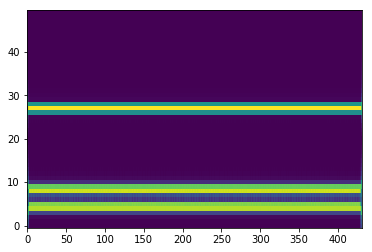

In [7]:
plt.imshow(spec[0].cpu().numpy(), aspect='auto', origin='lower')

# 2010

n_filters =  24
bins_per_octave =  24
fftLen =  1024
Q =  34.12708770892056
fmin =  880
24
1024
0.07002139091491699


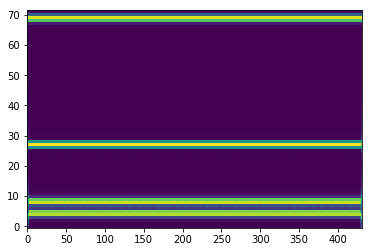

In [8]:
t_start = time.time()
mel_layer = Spectrogram.CQT2010(sr=fs, n_bins=n_bins, bins_per_octave=24, fmin=220, center=True)
time_used = time.time()-t_start
print(time_used)

timing = []

for e in range(5):
    t_start = time.time()
    spec2010 = mel_layer(y_torch)
    time_used = time.time()-t_start
#     print(time_used)
    timing.append(time_used)

plt.imshow(spec2010[0].cpu().numpy(), aspect='auto', origin='lower')

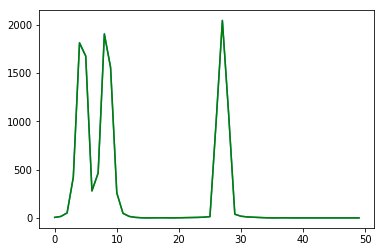

In [16]:
plt.plot(spec[0,:,20].cpu().numpy())
plt.plot(spec2010[0,:,20][:n_bins].cpu().numpy(), 'g')
# plt.plot(spec2010_2[0,:,20].cpu().numpy(), 'r--')

In [10]:
spec[0,:,20].cpu().numpy().shape

(50,)

In [11]:
spec2010[0,:,20][:].cpu().numpy().shape

(72,)

In [23]:
np.allclose(spec[0,:,20].cpu().numpy(), spec2010[0,:,20][:n_bins].cpu().numpy(), 1)

True

In [13]:
(spec[0,:,20].cpu().numpy() - spec2010[0,:,20][-n_bins:].cpu().numpy()).argmax()

27

In [14]:
spec[0,:,20][27]

tensor(2047.6353)

In [15]:
spec2010[0,:,20][27]

tensor(2042.8418)